## 准备数据集

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 设置随机种子
np.random.seed(50)

# 设置拟合函数为y=sinx
x_train = np.random.uniform(-2*np.pi,2*np.pi,size = (100,1))
y_train = np.sin(x_train)

## 模型搭建

In [12]:
class myModel:
    def __init__(self):
        ####################
        '''声明模型对应的参数'''
        ####################
        self.inputsize = 1
        self.hidensize = 10
        self.outputsize = 1

        self.learningrate = 0.01

        self.W1 = np.random.randn(self.inputsize,self.hidensize)
        self.W2 = np.random.randn(self.hidensize,self.outputsize)
        self.b1 = np.zeros((1,self.hidensize))
        self.b2 = np.zeros((1,self.outputsize))

    def forward(self, x):
        ###################
        '''向前传播'''
        ###################
        self.hidden_layer = np.maximum(0, np.dot(x, self.W1) + self.b1)
        self.output_layer = np.dot(self.hidden_layer, self.W2) + self.b2

    def backward(self, x, y):
        ###################
        '''向后传播'''
        ###################
        d_output = 2*(self.output_layer-y)/len(x)
        d_W2 = np.dot(self.hidden_layer.T,d_output)
        d_b2 = np.sum(d_output, axis=0, keepdims=True)
        d_hidden = np.dot(d_output, self.W2.T)
        d_hidden[self.hidden_layer <= 0] = 0
        d_W1 = np.dot(x.T, d_hidden)
        d_b1 = np.sum(d_hidden, axis=0, keepdims=True)

        ###################
        '''更新参数'''
        ###################
        self.W1 -= self.learningrate*d_W1
        self.b1 -= self.learningrate*d_b1
        self.W2 -= self.learningrate*d_W2
        self.b2 -= self.learningrate*d_b2
    
    def compute_loss(self,y):
        ###################
        '''计算loss'''
        ###################
        loss = np.mean((self.output_layer-y)**2)
        return loss

## 实际训练

In [13]:
hhhua = myModel()
for epoch in range(10000):
    hhhua.forward(x_train)
    hhhua.backward(x_train,y_train)
    print('epoch',epoch,': loss',hhhua.compute_loss(y_train))

epoch 0 : loss 4.7840064758381295
epoch 1 : loss 1.9190512788625913
epoch 2 : loss 1.0220951988567308
epoch 3 : loss 0.6740371569659288
epoch 4 : loss 0.5205667946224534
epoch 5 : loss 0.4488439871835381
epoch 6 : loss 0.413618816573208
epoch 7 : loss 0.3956575568000232
epoch 8 : loss 0.3858998291968604
epoch 9 : loss 0.3800863607760076
epoch 10 : loss 0.376173792511607
epoch 11 : loss 0.3731896455489265
epoch 12 : loss 0.3706646013197908
epoch 13 : loss 0.3683746616198406
epoch 14 : loss 0.3662195993812919
epoch 15 : loss 0.3641530705203047
epoch 16 : loss 0.36213452539367885
epoch 17 : loss 0.360158061612642
epoch 18 : loss 0.358228814999012
epoch 19 : loss 0.35632349595063906
epoch 20 : loss 0.3544406574711806
epoch 21 : loss 0.3525791615447652
epoch 22 : loss 0.3507380379277453
epoch 23 : loss 0.3489169355831002
epoch 24 : loss 0.3471146980218214
epoch 25 : loss 0.34533104344699905
epoch 26 : loss 0.3435689423717413
epoch 27 : loss 0.3418432468497389
epoch 28 : loss 0.3401334542171

## 可视化展示模型拟合效果

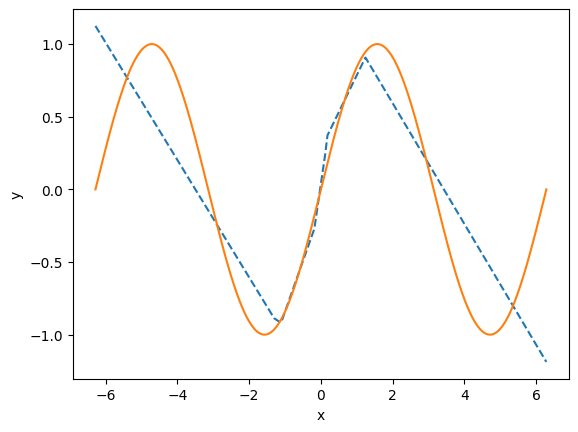

In [15]:
x_train=np.linspace(-2*np.pi,2*np.pi,1000).reshape(-1,1)
y_train=np.sin(x_train)
hhhua.forward(x_train)
plt.plot(x_train,hhhua.output_layer,'--',label='prediction')
plt.plot(x_train,y_train,label='truth')
plt.xlabel('x')
plt.ylabel('y')
plt.show()